In [1]:
import healpy as hp 
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import pickle as pl

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.simulation import CMBmap, FGMap, SkySimulation,CMBspectra,MakeSims
from taunet.ncm import NoiseModel

In [3]:
main_dir = '/marconi_work/INF24_litebird/anto/storage/TAUNET2'
paramdir = '/marconi/home/userexternal/aidicher/workspace/taunet/taunet/template_fitting'

In [4]:
cmbonly = SkySimulation(main_dir,0.06,add_fg=False,add_noise=False,fullsky=False)
cmbonly_cl = []
for i in tqdm(range(100)):
    cmbonly_cl.append(hp.alm2cl(cmbonly.Emode(100,i)))
cmbonly_cl = np.array(cmbonly_cl)

tau = 0.06


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:30<00:00,  3.32it/s]


In [81]:
tcl = cmbonly_cl.copy()
tcl_obs = cmb_fg_cl.copy()
tcl_obs2 = cmb_fg_cl2.copy()
l = np.arange(len(tcl[0]))
dl = l * (l+1) / (2*np.pi)
tcl = tcl * dl
tcl_obs = tcl_obs * dl
tcl_obs2 = tcl_obs2 * dl

In [99]:

plt.rc('text', usetex=True)

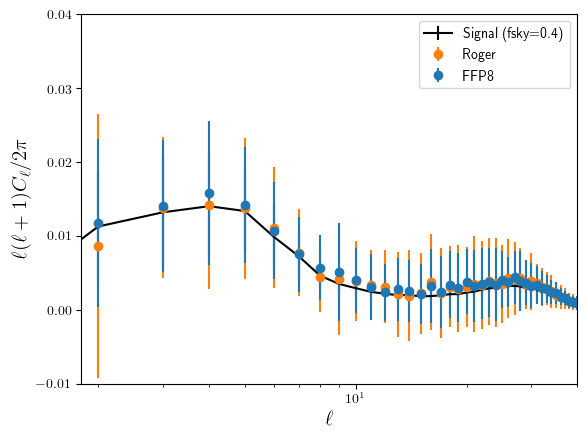

In [101]:
plt.errorbar(l,tcl.mean(axis=0),yerr=tcl.std(axis=0),label='Signal (fsky=0.4)',c='k')
plt.errorbar(l,tcl_obs2.mean(axis=0)*1e12,yerr=tcl_obs2.std(axis=0)*1e12,label='Roger',c='C11',fmt='o')
plt.errorbar(l,tcl_obs.mean(axis=0)*1e12,yerr=tcl_obs.std(axis=0)*1e12,label='FFP8',c='C10',fmt='o')
plt.semilogx()
plt.xlim(1.8,40)
plt.legend()
plt.ylim(-0.01,0.04)
plt.xlabel('$\ell$',fontsize=15)
plt.ylabel('$\ell(\ell+1)C_{\ell}/2\pi$',fontsize=15)
#plt.savefig('cl_comparison.pdf',dpi=300,bbox_inches='tight')

In [9]:
m = MakeSims(main_dir,fg=['s1','d1'],noise_g=False,noise_diag=False,nsim=100,ssim=0,fullsky=False,noise_method='ffp8')

Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 100/100 [00:00<00:00, 1687.87sim/s]


Generating noise covariance matrices: NoiseModel


In [11]:
cmb_fg_cl = m.anl_cleaned(100,True,False)

100%|██████████| 100/100 [00:03<00:00, 26.60it/s]


In [55]:
m2 = MakeSims(main_dir,fg=['s1','d1'],noise_g=False,noise_diag=False,nsim=100,ssim=0,fullsky=False,noise_method='roger')

Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 100/100 [00:00<00:00, 380.16sim/s]


Generating noise covariance matrices: NoiseModel


In [80]:
cmb_fg_cl2 = m2.anl_cleaned(100,True,False)

100%|██████████| 100/100 [00:03<00:00, 26.63it/s]


In [ ]:
band = 143
m.make_params(band,paramdir)
m.job_file(band, paramdir)
m.submit_job(band,paramdir)

Submitted batch job 13048235


100%|██████████| 100/100 [01:10<00:00,  1.42it/s]


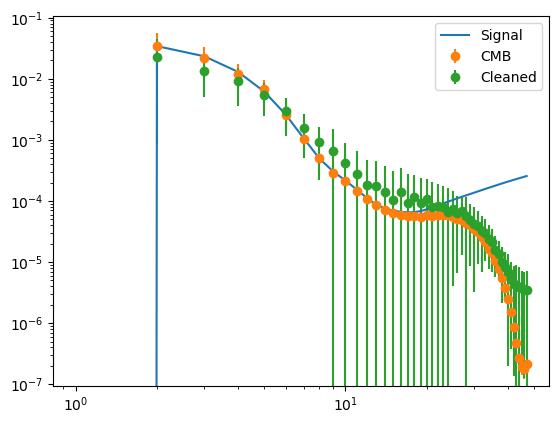

In [5]:
m.plot_cleaned(100)

100%|██████████| 50/50 [00:33<00:00,  1.48it/s]


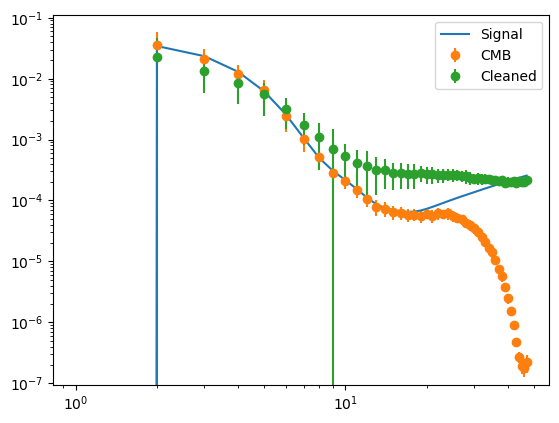

In [ ]:
m.plot_cleaned(50)
#plt.loglog(hp.alm2cl(e100,e143),label='CMB')

In [ ]:
#s0d0_fs = MakeSims(main_dir,fg=['s0','d0'],noise_g=True,nsim=50,ssim=0,fullsky=True)
s0d0 = MakeSims(main_dir,fg=['s0','d0'],noise_g=True,nsim=50,ssim=0,fullsky=False)
#s1d1 = MakeSims(main_dir,fg=['s1','d1'],noise_g=True,nsim=50,ssim=0,fullsky=False)
s1d1_roger = MakeSims(main_dir,fg=['s1','d1'],noise_g=False,nsim=50,ssim=0,fullsky=False)

Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 3695.03sim/s]


Generating noise covariance matrices: NoiseModelGaussian
Saved power spectra
tau = 0.06


Generating 353 GHz maps: 100%|██████████| 50/50 [00:00<00:00, 27924.79sim/s]

Generating noise covariance matrices: NoiseModel


In [ ]:
#cmbnoise_fs = SkySimulation(main_dir,0.06,fg=['s0','d0'],noise_g=True,fullsky=True,add_fg=False,add_noise=False,nsim=50)
cmbnoise_ps = SkySimulation(main_dir,0.06,fg=['s0','d0'],noise_g=True,fullsky=False,add_fg=False,add_noise=False,nsim=50)

tau = 0.06


In [ ]:
#cmbnoise_cl_fs = []
cmbnoise_cl_ps = []
for i in tqdm(range(100),desc='CMB noise',unit='sim'):
   # emode_fs = cmbnoise_fs.Emode(100,i)
    emode_ps = cmbnoise_ps.Emode(100,i)
   # cmbnoise_cl_fs.append(hp.alm2cl(emode_fs))
    cmbnoise_cl_ps.append(hp.alm2cl(emode_ps))
#cmbnoise_cl_fs = np.array(cmbnoise_cl_fs)
cmbnoise_cl_ps = np.array(cmbnoise_cl_ps)

CMB noise:   0%|          | 0/100 [00:00<?, ?sim/s]

CMB noise: 100%|██████████| 100/100 [01:39<00:00,  1.01sim/s]


In [ ]:
#ee_t,ee_s0d0_fs = s0d0_fs.anl_cleaned(50,True)
ee_s0d0 = s0d0.anl_cleaned(50,True,ret_cmb=False)
#ee_t,ee_s1d1 = s1d1.anl_cleaned(50,True)
ee_s1d1_roger = s1d1_roger.anl_cleaned(50,True,ret_cmb=False)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:33<00:00,  1.47it/s]


In [ ]:
l = np.arange(len(ee_s0d0[0]))

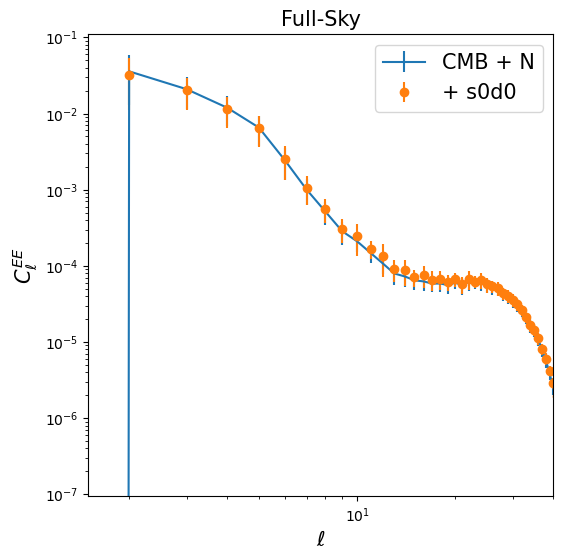

In [ ]:
plt.figure(figsize=(6,6))
plt.errorbar(l,cmbnoise_cl_fs.mean(axis=0) ,yerr=cmbnoise_cl_fs.std(axis=0),label='CMB + N')
plt.errorbar(l,ee_s0d0_fs.mean(axis=0),yerr=ee_s0d0_fs.std(axis=0),fmt='o',label='+ s0d0')
plt.loglog()
plt.title('Full-Sky', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(1.5,40)
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell^{EE}$', fontsize=15)
plt.savefig('fullsky.pdf',dpi=300,bbox_inches='tight')

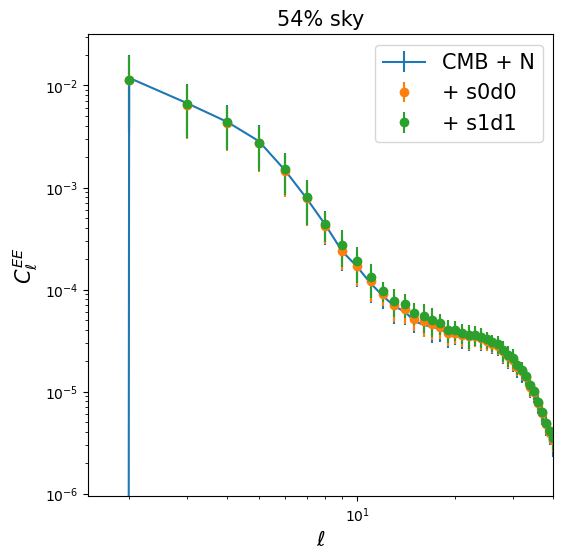

In [ ]:
plt.figure(figsize=(6,6))
plt.errorbar(l,cmbnoise_cl_ps.mean(axis=0) ,yerr=cmbnoise_cl_ps.std(axis=0),label='CMB + N')
plt.errorbar(l,ee_s0d0.mean(axis=0),yerr=ee_s0d0.std(axis=0),fmt='o',label='+ s0d0')
plt.errorbar(l,ee_s1d1.mean(axis=0),yerr=ee_s1d1.std(axis=0),fmt='o',label='+ s1d1')
plt.loglog()
plt.title('54% sky', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(1.5,40)
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell^{EE}$', fontsize=15)
plt.savefig('54sky.pdf',dpi=300,bbox_inches='tight')

Text(0, 0.5, '$C_\\ell^{EE}$')

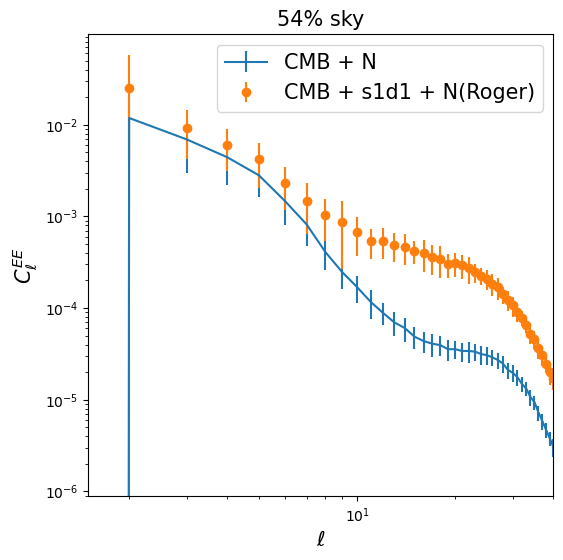

In [ ]:
plt.figure(figsize=(6,6))
plt.errorbar(l,cmbnoise_cl_ps.mean(axis=0) ,yerr=cmbnoise_cl_ps.std(axis=0),label='CMB + N')
#plt.errorbar(l,ee_s1d1.mean(axis=0),yerr=ee_s1d1.std(axis=0),fmt='o',label='+ s1d1')
plt.errorbar(l,ee_s1d1_roger.mean(axis=0)*1e12,yerr=ee_s1d1_roger.std(axis=0)*1e12,fmt='o',label='CMB + s1d1 + N(Roger)')
plt.loglog()
plt.title('54% sky', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(1.5,40)
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell^{EE}$', fontsize=15)
#plt.savefig('54skyR.pdf',dpi=300,bbox_inches='tight')
